In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.0

Epoch 38/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0059 - mae: 0.0583 - val_loss: 0.0046 - val_mae: 0.0570
Epoch 39/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0056 - mae: 0.0579 - val_loss: 0.0039 - val_mae: 0.0486
Epoch 40/100
20/20 [==============================] - 0s 15ms/step - loss: 0.0047 - mae: 0.0543 - val_loss: 0.0041 - val_mae: 0.0500
Epoch 41/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0068 - mae: 0.0619 - val_loss: 0.0047 - val_mae: 0.0559
Epoch 42/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0063 - mae: 0.0566 - val_loss: 0.0048 - val_mae: 0.0546
Epoch 43/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0059 - mae: 0.0563 - val_loss: 0.0037 - val_mae: 0.0463
Epoch 44/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0057 - mae: 0.0572 - val_loss: 0.0041 - val_mae: 0.0514
Epoch 45/100
20/20 [==============================] - 0s 6ms/step - loss: 0

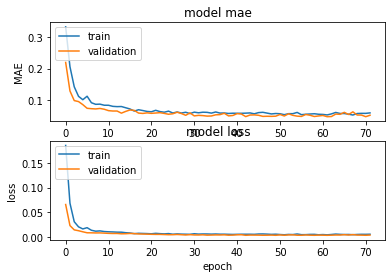

In [17]:
#load data from admissions_data.csv
dataset = pd.read_csv('admissions_data.csv')
labels = dataset.iloc[:,-1]
features =dataset.iloc[:,1:-1]

print(dataset.head())

print(dataset.describe())
print(features.head())

#data preprocessing

features_train, features_test, labels_train, labels_test =train_test_split(features, labels, 
                                                                           test_size = 0.2,random_state =40)
#scale numerical features
numerical_features=features.select_dtypes(include=['float64','int64'])
numerical_columns = numerical_features.columns
ct = ColumnTransformer([('scale', StandardScaler(),numerical_columns)], remainder='passthrough')

#fit the scale to the training data and convert from numpy arrays to pandas frame
features_train_scale =ct.fit_transform(features_train)

#applied the trained scale on the test data and convert from numpy arrays to pandas frame
features_test_scale=ct.transform(features_test)
#Create model
def creat_model():
    my_model = Sequential()
    num_features = features.shape[1]
    input = InputLayer(input_shape=(num_features,))
    my_model.add(input)
    my_model.add(Dense(8, activation='relu'))
    my_model.add(layers.Dropout(0.1))
    my_model.add(Dense(8, activation='relu'))
    my_model.add(layers.Dropout(0.2))
    my_model.add(Dense(1))
    print(my_model.summary())
    return my_model

#Initializing the optimizer and compiling model
my_model = creat_model()
opt = Adam(learning_rate=0.01)
my_model.compile(loss='mse',metrics=['mae'],optimizer=opt)

# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model with 100 epochs and a batch size of 16
# validation split at 0.2
history = my_model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, 
                       batch_size=16, verbose=1, validation_split=0.2, callbacks=[es])

# evaluate the model
val_mse, val_mae = my_model.evaluate(features_test_scale, labels_test.to_numpy(), verbose = 0)

# view the MAE performance
print("MAE: ", val_mae)
print("MSE: ", val_mse)
# evauate r-squared score
y_pred = my_model.predict(features_test_scale)

print('Score: ',r2_score(labels_test,y_pred))

# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()